In [ ]:
## 3 Maneras de Programar a una Red Neuronal - DOTCSV (https://www.youtube.com/watch?v=qTNUbPkR2ao)

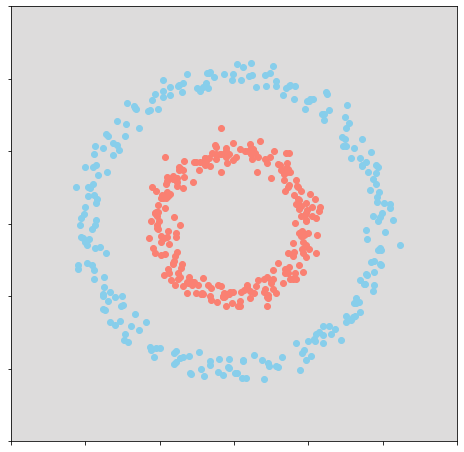

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

In [5]:
#CON TENSORFLOW

import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)


Step 0 / 1000 - Loss =  0.49661565 - Acc = 0.5
Step 25 / 1000 - Loss =  0.49482414 - Acc = 0.5
Step 50 / 1000 - Loss =  0.4895984 - Acc = 0.5
Step 75 / 1000 - Loss =  0.45594263 - Acc = 0.5
Step 100 / 1000 - Loss =  0.40900448 - Acc = 0.578
Step 125 / 1000 - Loss =  0.39696082 - Acc = 0.592
Step 150 / 1000 - Loss =  0.38536105 - Acc = 0.606
Step 175 / 1000 - Loss =  0.37432188 - Acc = 0.62
Step 200 / 1000 - Loss =  0.36443982 - Acc = 0.624
Step 225 / 1000 - Loss =  0.35501593 - Acc = 0.632
Step 250 / 1000 - Loss =  0.34331778 - Acc = 0.636
Step 275 / 1000 - Loss =  0.32768303 - Acc = 0.64
Step 300 / 1000 - Loss =  0.30749166 - Acc = 0.65
Step 325 / 1000 - Loss =  0.28746393 - Acc = 0.656
Step 350 / 1000 - Loss =  0.27069858 - Acc = 0.676
Step 375 / 1000 - Loss =  0.2568091 - Acc = 0.758
Step 400 / 1000 - Loss =  0.24383393 - Acc = 0.774
Step 425 / 1000 - Loss =  0.23002467 - Acc = 0.782
Step 450 / 1000 - Loss =  0.21607675 - Acc = 0.794
Step 475 / 1000 - Loss =  0.20180711 - Acc = 0.80

In [6]:
##CON KERAS


import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
500/500 [==============================] - 0s 286us/sample - loss: 0.2544 - acc: 0.5060
Epoch 2/100
500/500 [==============================] - 0s 30us/sample - loss: 0.2530 - acc: 0.4460
Epoch 3/100
500/500 [==============================] - 0s 26us/sample - loss: 0.2517 - acc: 0.4540
Epoch 4/100
500/500 [==============================] - 0s 28us/sample - loss: 0.2505 - acc: 0.4740
Epoch 5/100
500/500 [==============================] - 0s 28us/sample - loss: 0.2494 - acc: 0.4820
Epoch 6/100
500/500 [==============================] - 0s 26us/sample - loss: 0.2484 - acc: 0.4860
Epoch 7/100
500/500 [==============================] - 0s 32us/sample - loss: 0.2472 - acc: 0.5200
Epoch 8/100
500/500 [==============================] - 0s 28us/sample - loss: 0.2462 - acc: 0.4980
Epoch 9/100
500/500 [==============================] - 0s 30us/sample - loss: 0.2452 - ac

500/500 [==============================] - 0s 40us/sample - loss: 0.0560 - acc: 1.0000
Epoch 80/100
500/500 [==============================] - 0s 28us/sample - loss: 0.0536 - acc: 1.0000
Epoch 81/100
500/500 [==============================] - 0s 28us/sample - loss: 0.0513 - acc: 1.0000
Epoch 82/100
500/500 [==============================] - 0s 32us/sample - loss: 0.0492 - acc: 1.0000
Epoch 83/100
500/500 [==============================] - 0s 28us/sample - loss: 0.0472 - acc: 1.0000
Epoch 84/100
500/500 [==============================] - 0s 46us/sample - loss: 0.0452 - acc: 1.0000
Epoch 85/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0435 - acc: 1.0000
Epoch 86/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0417 - acc: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 30us/sample - loss: 0.0401 - acc: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 28us/sample - loss: 0.0385 - acc: 1.0000
Epoch 89/100


In [7]:
## Con Sklearn

import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)

# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.17902685
Iteration 2, loss = 0.14316809
Iteration 3, loss = 0.12737719
Iteration 4, loss = 0.12533266
Iteration 5, loss = 0.12617611
Iteration 6, loss = 0.12570906
Iteration 7, loss = 0.12512055
Iteration 8, loss = 0.12498583
Iteration 9, loss = 0.12514346
Iteration 10, loss = 0.12516936
Iteration 11, loss = 0.12504432
Iteration 12, loss = 0.12506620
Iteration 13, loss = 0.12516148
Iteration 14, loss = 0.12509581
Iteration 15, loss = 0.12509841
Iteration 16, loss = 0.12506812
Iteration 17, loss = 0.12504017
Iteration 18, loss = 0.12510554
Iteration 19, loss = 0.12511558
Iteration 20, loss = 0.12507465
Iteration 21, loss = 0.12507658
Iteration 22, loss = 0.12504983
Iteration 23, loss = 0.12503783
Iteration 24, loss = 0.12516578
Iteration 25, loss = 0.12519770
Iteration 26, loss = 0.12502930
Iteration 27, loss = 0.12504108
Iteration 28, loss = 0.12506247
Iteration 29, loss = 0.12504713
Iteration 30, loss = 0.12506515
Iteration 31, loss = 0.12508038
Iteration 32, los

C:\Users\hq_admin15\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
             learning_rate_init=0.01, max_iter=200, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)